### MACHINE LEARNING FOR BANKING -- ANALYTICS VIDHYA

#### AGENDA:
To build a ML model to predict the loan rate category(1 / 2 / 3) that will be assigned to each loan in our customer dataset.

###### TARGET VARIABLE       [Classification problem]
Loan Rate Category : No of classes is 3 [Multi class Target variable]

#### Machine Learning Algorithm used

1. XGBoost Algorithm
2. LightGBM Algorithm

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn.model_selection as model_selection

In [3]:
import sklearn.metrics as metrics

In [4]:
dt_tr=pd.read_csv("train_bnk.csv")           ####  train dataset
dt_ts=pd.read_csv("test_bnk.csv")            ####  test dataset

#### DATA PREPERATION FOR TRAIN DATASET

1. Detecting outlier  --- Using IQR formula   
2. Imputing Null values

In [5]:
dt_tr.shape

(164309, 14)

In [6]:
dt_tr.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [7]:
dt_tr.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [8]:
dt_tr.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [9]:
dt_tr["Loan_Amount_Requested"]=dt_tr["Loan_Amount_Requested"].str.replace(",","")

In [10]:
dt_tr["Loan_Amount_Requested"]=pd.to_numeric(dt_tr["Loan_Amount_Requested"],errors='coerce')

In [11]:
dt_tr["Loan_Amount_Requested"].quantile(np.arange(0,1,.01))

0.00      500.0
0.01     1800.0
0.02     2300.0
0.03     2800.0
0.04     3000.0
0.05     3500.0
0.06     4000.0
0.07     4000.0
0.08     4500.0
0.09     4800.0
0.10     5000.0
0.11     5000.0
0.12     5000.0
0.13     5500.0
0.14     5875.0
0.15     6000.0
0.16     6000.0
0.17     6000.0
0.18     6400.0
0.19     6800.0
0.20     7000.0
0.21     7150.0
0.22     7400.0
0.23     7725.0
0.24     8000.0
0.25     8000.0
0.26     8000.0
0.27     8325.0
0.28     8500.0
0.29     9000.0
         ...   
0.70    18000.0
0.71    18000.0
0.72    18500.0
0.73    19200.0
0.74    19800.0
0.75    20000.0
0.76    20000.0
0.77    20000.0
0.78    20000.0
0.79    20050.0
0.80    21000.0
0.81    21000.0
0.82    22000.0
0.83    22750.0
0.84    23925.0
0.85    24000.0
0.86    24000.0
0.87    25000.0
0.88    25000.0
0.89    25000.0
0.90    26375.0
0.91    28000.0
0.92    28000.0
0.93    29250.0
0.94    30000.0
0.95    30000.0
0.96    33000.0
0.97    35000.0
0.98    35000.0
0.99    35000.0
Name: Loan_Amount_Reques

In [12]:
dt_tr["Loan_Amount_Requested"]=np.where(dt_tr["Loan_Amount_Requested"]>32000,32000,dt_tr["Loan_Amount_Requested"])

In [13]:
dt_tr['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [14]:
dt_tr[['Length_Employed','Annual_Income']].groupby('Length_Employed').median()

,Annual_Income
Length_Employed,
1 year,60000.0
10+ years,70000.0
2 years,60000.0
3 years,60000.0
4 years,60000.0
5 years,60000.0
6 years,61360.0
7 years,62000.0
8 years,63000.0


In [15]:
dt_tr.loc[dt_tr['Annual_Income'] <60000.00,'Length_Employed'] = dt_tr.loc[dt_tr['Annual_Income'] <60000.00,'Length_Employed'].fillna('< 1 year')

In [16]:
dt_tr.loc[dt_tr['Annual_Income'] >=60000.00,'Length_Employed'] = dt_tr.loc[dt_tr['Annual_Income'] >=60000.00,'Length_Employed'].fillna('2 years')

In [17]:
dt_tr.loc[dt_tr['Annual_Income']>=70000.00,'Length_Employed']=dt_tr.loc[dt_tr['Annual_Income']>=70000.00,'Length_Employed'].fillna('10+ years')

In [18]:
dt_tr['Length_Employed'].fillna('10+ years',inplace= True)

In [19]:
dt_tr['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [20]:
dt_tr[['Home_Owner','Annual_Income']].groupby('Home_Owner').median()

,Annual_Income
Home_Owner,
Mortgage,72000.0
None,55650.0
Other,57500.0
Own,55000.0
Rent,54000.0


In [21]:
dt_tr.loc[dt_tr['Annual_Income']>=72000.0,'Home_Owner']=dt_tr.loc[dt_tr['Annual_Income']>=72000.0,'Home_Owner'].fillna('Mortgage')

In [22]:
dt_tr.loc[dt_tr['Annual_Income']<72000.0,'Home_Owner']=dt_tr.loc[dt_tr['Annual_Income']<72000.0,'Home_Owner'].fillna('Rent')

In [23]:
dt_tr['Home_Owner'].fillna('Mortgage',inplace=True)

In [24]:
dt_tr['Annual_Income'].quantile(np.arange(0,1,0.01))

0.00      4000.0000
0.01     19000.0000
0.02     22000.0000
0.03     24996.0000
0.04     26000.0000
0.05     28000.0000
0.06     30000.0000
0.07     30000.0000
0.08     31022.9712
0.09     32004.0000
0.10     34000.0000
0.11     35000.0000
0.12     35000.0000
0.13     36000.0000
0.14     37000.0000
0.15     38000.0000
0.16     39205.7600
0.17     40000.0000
0.18     40000.0000
0.19     40000.0000
0.20     41900.0000
0.21     42000.0000
0.22     43000.0000
0.23     44000.0000
0.24     45000.0000
0.25     45000.0000
0.26     45000.0000
0.27     46435.7200
0.28     47800.0000
0.29     48000.0000
           ...     
0.70     81000.0000
0.71     83000.0000
0.72     85000.0000
0.73     85000.0000
0.74     86000.0000
0.75     88697.5000
0.76     90000.0000
0.77     90000.0000
0.78     92000.0000
0.79     95000.0000
0.80     96000.0000
0.81     98000.0000
0.82    100000.0000
0.83    100000.0000
0.84    103000.0000
0.85    105000.0000
0.86    109000.0000
0.87    110000.0000
0.88    115000.0000


In [25]:
dt_tr['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [26]:
iqr=8.869750e+04-4.500000e+04
iqr

43697.5

In [27]:
4.500000e+04-iqr

1302.5

In [28]:
8.869750e+04+iqr

132395.0

In [29]:
q1=dt_tr['Annual_Income'].quantile(0.96)
q1

157000.0

In [30]:
dt_tr['Annual_Income']=np.where(dt_tr['Annual_Income']>q1,q1,dt_tr['Annual_Income'])

In [31]:
dt_tr['Annual_Income'].fillna(63000.0,inplace=True)

In [32]:
dt_tr['Months_Since_Deliquency'].fillna(31,inplace=True)

In [33]:
dt_tr.drop(["Loan_ID"],axis=1,inplace=True)

#### DATA PREPERATION FOR TEST DATASET

Detecting outliers & Imputing null nalues

In [34]:
Loan_ID = dt_ts["Loan_ID"]
Loan_ID.head()

0    10164310
1    10164311
2    10164312
3    10164313
4    10164314
Name: Loan_ID, dtype: int64

In [35]:
dt_ts.drop(["Loan_ID"],axis=1,inplace=True)

In [36]:
dt_ts.dtypes

Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
dtype: object

In [37]:
dt_ts.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [38]:
dt_ts["Loan_Amount_Requested"]=dt_ts["Loan_Amount_Requested"].str.replace(",","")

In [39]:
dt_ts["Loan_Amount_Requested"]=pd.to_numeric(dt_ts["Loan_Amount_Requested"],errors='coerce')

In [40]:
dt_ts["Loan_Amount_Requested"].quantile(np.arange(0,1,0.01))

0.00      500.0
0.01     1800.0
0.02     2400.0
0.03     2875.0
0.04     3000.0
0.05     3500.0
0.06     4000.0
0.07     4000.0
0.08     4500.0
0.09     4850.0
0.10     5000.0
0.11     5000.0
0.12     5000.0
0.13     5500.0
0.14     5900.0
0.15     6000.0
0.16     6000.0
0.17     6000.0
0.18     6400.0
0.19     6800.0
0.20     7000.0
0.21     7125.0
0.22     7375.0
0.23     7700.0
0.24     8000.0
0.25     8000.0
0.26     8000.0
0.27     8325.0
0.28     8500.0
0.29     9000.0
         ...   
0.70    18000.0
0.71    18000.0
0.72    18600.0
0.73    19200.0
0.74    19975.0
0.75    20000.0
0.76    20000.0
0.77    20000.0
0.78    20000.0
0.79    20050.0
0.80    21000.0
0.81    21000.0
0.82    22000.0
0.83    22750.0
0.84    23850.0
0.85    24000.0
0.86    24000.0
0.87    25000.0
0.88    25000.0
0.89    25000.0
0.90    26375.0
0.91    28000.0
0.92    28000.0
0.93    29700.0
0.94    30000.0
0.95    30225.0
0.96    33000.0
0.97    35000.0
0.98    35000.0
0.99    35000.0
Name: Loan_Amount_Reques

In [41]:
dt_ts["Loan_Amount_Requested"]=np.where(dt_ts["Loan_Amount_Requested"]>32000,32000,dt_ts["Loan_Amount_Requested"])

In [42]:
dt_ts["Loan_Amount_Requested"].describe()

count    109541.000000
mean      14240.323030
std        8022.595397
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       32000.000000
Name: Loan_Amount_Requested, dtype: float64

In [43]:
iqr1=20000.000000-8000.000000
iqr1

12000.0

In [44]:
8000.000000-iqr1

-4000.0

In [45]:
20000.000000+iqr1

32000.0

In [46]:
dt_ts['Length_Employed'].value_counts()

10+ years    35413
2 years       9800
3 years       8504
< 1 year      8328
5 years       7228
1 year        6914
4 years       6609
6 years       6257
7 years       6136
8 years       5198
9 years       4218
Name: Length_Employed, dtype: int64

In [47]:
dt_ts[['Length_Employed','Annual_Income']].groupby('Length_Employed').median()

,Annual_Income
Length_Employed,
1 year,58000.0
10+ years,70000.0
2 years,60000.0
3 years,60000.0
4 years,60000.0
5 years,60000.0
6 years,61000.0
7 years,63500.0
8 years,65000.0


In [48]:
dt_ts.loc[dt_ts['Annual_Income'] <60000.00,'Length_Employed'] = dt_ts.loc[dt_ts['Annual_Income'] <60000.00,'Length_Employed'].fillna('< 1 year')

In [49]:
dt_ts.loc[dt_ts['Annual_Income'] >=60000.00,'Length_Employed'] = dt_ts.loc[dt_ts['Annual_Income'] >=60000.00,'Length_Employed'].fillna('2 years')

In [50]:
dt_ts.loc[dt_ts['Annual_Income']>=70000.00,'Length_Employed']=dt_ts.loc[dt_ts['Annual_Income']>=70000.00,'Length_Employed'].fillna('10+ years')

In [51]:
dt_ts['Length_Employed'].fillna('10+ years',inplace= True)

In [52]:
dt_ts['Home_Owner'].value_counts()

Mortgage    46925
Rent        37511
Own          8354
Other          30
None           10
Name: Home_Owner, dtype: int64

In [53]:
dt_ts[['Home_Owner','Annual_Income']].groupby('Home_Owner').median()

,Annual_Income
Home_Owner,
Mortgage,72000.0
None,70500.0
Other,72000.0
Own,55000.0
Rent,54000.0


In [54]:
dt_ts.loc[dt_ts['Annual_Income']>=72000.0,'Home_Owner']=dt_ts.loc[dt_ts['Annual_Income']>=72000.0,'Home_Owner'].fillna('Mortgage')

In [55]:
dt_ts.loc[dt_ts['Annual_Income']<72000.0,'Home_Owner']=dt_ts.loc[dt_ts['Annual_Income']<72000.0,'Home_Owner'].fillna('Rent')

In [56]:
dt_ts['Home_Owner'].fillna('Mortgage',inplace=True)

In [57]:
dt_ts['Annual_Income'].quantile(np.arange(0,1,0.01))

0.00      3000.00
0.01     18500.00
0.02     22000.00
0.03     25000.00
0.04     26000.00
0.05     28000.00
0.06     30000.00
0.07     30000.00
0.08     31514.88
0.09     32500.00
0.10     34000.00
0.11     35000.00
0.12     35000.00
0.13     36000.00
0.14     37000.00
0.15     38000.00
0.16     39000.00
0.17     40000.00
0.18     40000.00
0.19     40000.00
0.20     41600.00
0.21     42000.00
0.22     43000.00
0.23     44000.00
0.24     45000.00
0.25     45000.00
0.26     45000.00
0.27     46250.00
0.28     47800.00
0.29     48000.00
          ...    
0.70     81000.00
0.71     83000.00
0.72     85000.00
0.73     85000.00
0.74     86400.00
0.75     89000.00
0.76     90000.00
0.77     90000.00
0.78     92000.00
0.79     95000.00
0.80     96000.00
0.81     98000.00
0.82    100000.00
0.83    100000.00
0.84    103000.00
0.85    105000.00
0.86    109000.00
0.87    110000.00
0.88    115000.00
0.89    118450.00
0.90    120000.00
0.91    125000.00
0.92    130000.00
0.93    135000.00
0.94    14

In [58]:
dt_ts['Annual_Income'].describe()

count    9.264300e+04
mean     7.348541e+04
std      5.563845e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.900000e+04
max      7.446395e+06
Name: Annual_Income, dtype: float64

In [59]:
iqr2=8.900000e+04-4.500000e+04
iqr2

44000.0

In [60]:
4.500000e+04-iqr2

1000.0

In [61]:
8.900000e+04+iqr2

133000.0

In [62]:
dt_ts['Annual_Income']=np.where(dt_ts['Annual_Income']>160000.00,160000.00,dt_ts['Annual_Income'])

In [63]:
dt_ts['Annual_Income'].fillna(63000.0,inplace=True)

In [64]:
dt_ts['Months_Since_Deliquency'].fillna(31,inplace=True)

In [65]:
dt_train=dt_tr.copy()

In [66]:
X_test=dt_ts.copy()

In [67]:
dt_train.dtypes

Loan_Amount_Requested        int64
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [68]:
X_train=dt_train.drop(["Interest_Rate"],axis=1)
y_train=dt_train["Interest_Rate"]

In [69]:
X_train=pd.get_dummies(X_train)

In [70]:
X_train.dtypes

Loan_Amount_Requested                         int64
Annual_Income                               float64
Debt_To_Income                              float64
Inquiries_Last_6Mo                            int64
Months_Since_Deliquency                     float64
Number_Open_Accounts                          int64
Total_Accounts                                int64
Length_Employed_1 year                        uint8
Length_Employed_10+ years                     uint8
Length_Employed_2 years                       uint8
Length_Employed_3 years                       uint8
Length_Employed_4 years                       uint8
Length_Employed_5 years                       uint8
Length_Employed_6 years                       uint8
Length_Employed_7 years                       uint8
Length_Employed_8 years                       uint8
Length_Employed_9 years                       uint8
Length_Employed_< 1 year                      uint8
Home_Owner_Mortgage                           uint8
Home_Owner_N

In [71]:
X_test=pd.get_dummies(X_test)

In [72]:
X_test.dtypes

Loan_Amount_Requested                         int64
Annual_Income                               float64
Debt_To_Income                              float64
Inquiries_Last_6Mo                            int64
Months_Since_Deliquency                     float64
Number_Open_Accounts                          int64
Total_Accounts                                int64
Length_Employed_1 year                        uint8
Length_Employed_10+ years                     uint8
Length_Employed_2 years                       uint8
Length_Employed_3 years                       uint8
Length_Employed_4 years                       uint8
Length_Employed_5 years                       uint8
Length_Employed_6 years                       uint8
Length_Employed_7 years                       uint8
Length_Employed_8 years                       uint8
Length_Employed_9 years                       uint8
Length_Employed_< 1 year                      uint8
Home_Owner_Mortgage                           uint8
Home_Owner_N

In [73]:
X_train.shape

(164309, 42)

In [74]:
X_train.shape

(164309, 42)

###  FEATURE IMPORTANCE

1.ExtraTreesClassifer

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [76]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)

C:\Users\Soma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.37084693e-01 1.28791731e-01 1.42276279e-01 5.52862408e-02
 9.52116354e-02 1.20160854e-01 1.31291477e-01 7.97615160e-03
 1.19827269e-02 9.56113902e-03 8.99008952e-03 8.24348645e-03
 8.61584500e-03 7.86821682e-03 7.71534941e-03 7.50987683e-03
 6.23835761e-03 9.40467097e-03 5.73326089e-03 4.06295724e-05
 1.33969633e-04 5.28641409e-03 5.66324222e-03 7.46384339e-03
 4.45681802e-03 1.38187180e-02 1.61785646e-03 6.61255313e-03
 4.58994421e-03 2.86350008e-04 2.77252342e-03 9.76586811e-04
 2.06755370e-03 1.17555437e-03 1.19800158e-03 4.33134754e-03
 3.11736913e-04 1.71400092e-03 1.00105402e-03 9.96739280e-04
 1.19194384e-02 1.16230440e-02]


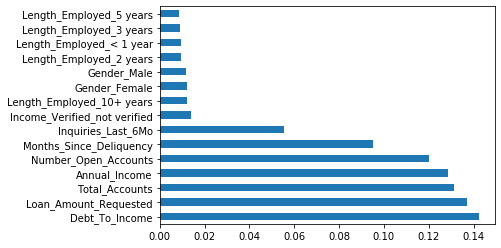

In [80]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### 2. Correlation Heat map

In [77]:
import seaborn as sns

In [78]:
corrmat = dt_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

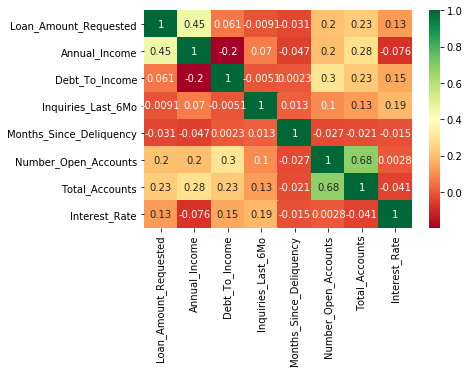

In [79]:
g=sns.heatmap(dt_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### FEATURE SELECTION

In [82]:
X_train1=X_train[['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts','Total_Accounts', 'Length_Employed_10+ years','Length_Employed_2 years', 'Length_Employed_3 years','Length_Employed_5 years','Income_Verified_VERIFIED - income','Income_Verified_not verified','Gender_Female', 'Gender_Male']]

In [83]:
X_train1.shape

(164309, 15)

In [84]:
X_test1=X_test[['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts','Total_Accounts', 'Length_Employed_10+ years','Length_Employed_2 years', 'Length_Employed_3 years','Length_Employed_5 years','Income_Verified_VERIFIED - income','Income_Verified_not verified','Gender_Female', 'Gender_Male']]

In [85]:
X_test1.shape

(109541, 15)

In [86]:
X_train2=X_train[['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts','Total_Accounts', 'Length_Employed_10+ years','Income_Verified_not verified', 'Gender_Male']]

In [87]:
X_train2.shape

(164309, 10)

In [88]:
X_test2=X_test[['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income','Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts','Total_Accounts', 'Length_Employed_10+ years','Income_Verified_not verified', 'Gender_Male']]

In [89]:
X_test2.shape

(109541, 10)

### MODEL BUILDING

In [90]:
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,StratifiedKFold
import lightgbm as lgb
import xgboost as xgb

C:\Users\Soma\Anaconda3\lib\site-packages\distributed\utils.py:139: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [91]:
sk = StratifiedKFold(n_splits=5,shuffle=False,random_state=42)

### 1.XGBoost Algorithm

In [92]:

ht1=xgb.XGBClassifier(random_state=42,n_jobs=-1,verbosity=1,objective="multi:softmax",num_class=3)
prms   = {"max_depth":[4,6,8,10],
         "n_estimators":[80,130,180,230,300,350,400],
        "learning_rate":[0.1,0.01,0.03,0.07,0.001],
       "subsample":[0.5,0.6,0.7,0.8,0.9],
          "colsample_bytree":[0.5,0.6,0.7,0.8,0.9],
          "reg_alpha":[0.25,0.5,1],
          "reg_lambda":[0.25,0.5,1]}
xgb_mod = RandomizedSearchCV(estimator=ht1,param_distributions=prms,cv=sk.split(X_train1,y_train),scoring='f1_weighted')
xgb_mod.fit(X_train1,y_train) ####

In [93]:
xgb_mod.best_estimator_,xgb_mod.best_params_,xgb_mod.best_score_

###  2. LightGBM Algorithm

In [94]:
ht2 = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass',num_class=3,random_state=42,n_jobs=-1,verbose=1,)

In [1]:
#### Hyperparameter Tuning

In [95]:
prms   = {"max_depth":[4,6,8,10],
          "learning_rate":[0.1,0.01,0.03,0.07,0.001],
          "subsample":[0.5,0.7,0.9],
          "colsample_bytree":[0.5,0.7,0.9],
          "reg_alpha":[0,0.25,0.5,1],
          "reg_lambda":[0,0.25,0.5,1],
          "num_leaves":[15,63,127],
          "min_data_in_leaf":[1,7,10,25,50,100],
          "n_estimators":list(range(50,570,100))}

In [96]:
lgbm_mod = RandomizedSearchCV(estimator=ht2,param_distributions=prms,cv=sk.split(X_train2,y_train),scoring='f1_weighted')
lgbm_mod.fit(X_train2,y_train)

C:\Users\Soma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000017707361408>,
                   error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_class=3,...
                                        'learning_rate': [0.1, 0.01, 0.03, 0.07,
                                                          0.001],
                                        'max_dep

In [97]:
lgbm_mod.best_estimator_,lgbm_mod.best_params_,lgbm_mod.best_score_

(LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
                importance_type='split', learning_rate=0.1, max_depth=4,
                min_child_samples=20, min_child_weight=0.001,
                min_data_in_leaf=100, min_split_gain=0.0, n_estimators=550,
                n_jobs=-1, num_class=3, num_leaves=63, objective='multiclass',
                random_state=42, reg_alpha=0, reg_lambda=1, silent=True,
                subsample=0.5, subsample_for_bin=200000, subsample_freq=0,
                verbose=1),
 {'subsample': 0.5,
  'reg_lambda': 1,
  'reg_alpha': 0,
  'num_leaves': 63,
  'n_estimators': 550,
  'min_data_in_leaf': 100,
  'max_depth': 4,
  'learning_rate': 0.1,
  'colsample_bytree': 0.7},
 0.5149860332348692)

#### PREDICTION

In [98]:
pred1=lgbm_mod.best_estimator_.predict(X_test2)

####  SUBMISSION FILE

In [107]:
sub1=pd.DataFrame({"Loan_ID":Loan_ID,"Interest_Rate":pred1})

In [108]:
sub1.to_csv("sbm_bnk.csv",index=False)